# Get satellite rainfall estimates

This notebook allows for downloading of rainfall estimates product from different providers, and preprocessing for their direct use in crop simulation models of the SARRA family (SARRA-O, SARRA-Py). That is to say the output format is a series of geotiff files, one per day, with the same spatial resolution as the input data. The output files are stored in the './data/3_output/' directory.

Rainfall estimates products available :
- TAMSAT (https://www.tamsat.org.uk/)
- CHIRPS (https://www.chc.ucsb.edu/data/chirps)
- IMERG (https://gpm.nasa.gov/data/imerg)


## 1. Imports

In [1]:
import sys
from datetime import datetime
sys.path.append('../src/SARRA_data_download/')
from get_satellite_rainfall_estimates import *

## 2. Parameters

In [2]:
# defining dictionary of coordinates for areas of interest
# bounding box coordinates format : [lat NW, lon NW, lat SE, lon SE]
area = {
    'burkina': [16, -6, 9, 3],
    'niger':[23.8, -0.5, 11.3, 15.9],
    'west_africa':[29, -20, 3.5, 26]}

# selecting area of interest
selected_area = "burkina"

# selecting year of interest
year = 2020

# defining save path
save_path = "../data/3_output/"

# IMERG credentials
# /!\ you must have a NASA Earthdata account to download IMERG data
# for access procedure see https://gpm.nasa.gov/sites/default/files/2021-01/arthurhouhttps_retrieval.pdf
username = "nom.prenom@fournisseur.com"
password = "nom.prenom@fournisseur.com"

## 3. Download

In [3]:
# downloading data from TAMSAT
download_TAMSAT_year(year, area, selected_area, save_path)

100%|██████████| 366/366 [04:08<00:00,  1.47it/s]


In [4]:
# downloading data from CHIRPS
download_CHIRPS_year(year, area, selected_area, save_path)

100%|██████████| 366/366 [18:56<00:00,  3.11s/it]


In [3]:
# downloading data from IMERG
download_IMERG_year(year, area, selected_area, save_path, username, password)

100%|██████████| 366/366 [08:54<00:00,  1.46s/it]


## 4. Loading data into xarrays

In [3]:
# parameters of our time series
date_start = datetime.date(2020,1,1)
duration = 365

In [4]:
# retreiving grid size of the most finely resoluted dataset (here, TAMSAT)
rainfall_path = "../data/3_output/TAMSAT_v3.1_burkina_rfe_filled/"
grid_width, grid_height = get_grid_size(rainfall_path, date_start, duration)

In [5]:
# loading TAMSAT data into a xarray dataset
data = xr.Dataset()
data = load_TAMSAT_data(data, rainfall_path, date_start, duration)

In [6]:
# loading CHIRPS data into the "data" xarray dataset
rainfall_path = "../data/3_output/CHIRPS_v2.0_Africa_burkina"
new_var_name = "rain_CHIRPS"
data = load_lower_res_rain_data(data, rainfall_path, date_start, duration, new_var_name)

In [7]:
# loading IMERG data into into the "data" xarray dataset
rainfall_path = "../data/3_output/IMERG_burkina_band_data"
new_var_name = "rain_IMERG"
data = load_lower_res_rain_data(data, rainfall_path, date_start, duration, new_var_name)

## 5. Plotting results

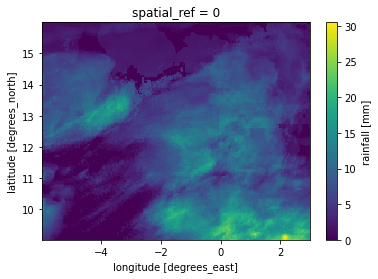

In [10]:
# plotting day #200 of the TAMSAT dataset
data["rain"][200,:,:].plot()

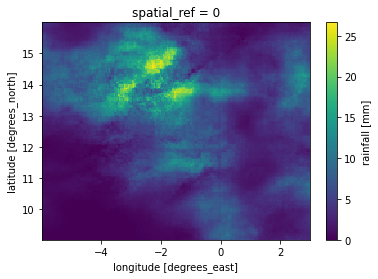

In [11]:
# plotting day #200 of the CHIRPS dataset
data["rain_CHIRPS"][200,:,:].plot()

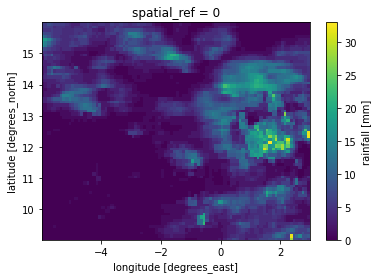

In [12]:
# plotting day #200 of the IMERG dataset
data["rain_IMERG"][200,:,:].plot()